In [129]:
# b_init = 785.1811367994083
# w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
# print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

In [374]:
import pandas as pd 
import numpy as np
df = pd.read_csv("Mobile-Price-Prediction-cleaned_data.csv")
df
Y = np.array(df['Price'])
Y.shape

(807,)

In [289]:
# mean =df['Price'].mean()
# print(mean)
mean1 = df.mean()
mean1

Ratings              4.112639
RAM                  5.941760
ROM                 64.390335
Mobile_Size          5.620660
Primary_Cam         47.821561
Selfi_Cam            8.868649
Battery_Power     3278.859975
Price            14269.167286
dtype: float64

In [290]:
14269.167286-(3278.859975+8.868649+47.821561+5.620660+64.390335+5.941760+4.112639)

10853.551706999999

In [375]:
df = df.drop('Price',axis=1)
df.shape

(807, 7)

In [376]:
X =np.array(df)
X.shape

(807, 7)

In [327]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [328]:

x_train[1]

array([-1.12251586,  1.00153547, -0.00725054, -0.283356  ,  0.0160049 ,
       -0.6312444 , -0.29759422])

In [377]:
sw = np.array([[1,1,1,1,1,1,1]])
# sw.reshape(7,1)
# print(x_train[1])
print(np.dot(x_train[1],sw))

# sw.shape

ValueError: shapes (7,) and (1,7) not aligned: 7 (dim 0) != 1 (dim 0)

In [381]:
def predict(ws,b,xt):
    y = [np.sum([w*x for w,x in zip(ws,row)])+b for row in xt]
    
    return y

In [390]:

def gradient_function(w,b,x,y):
    m,n = x.shape
    
    sumw = np.zeros(7)
    sumb = 0

    p=predict(w,b,x)
    p = list(p)
    y = list(y)
    print(len(p),type(p))
    print(len(y),type(y))
    error =[p-a for p,a in zip(p,y)] 
    # print(f"salam{error}") 
    
    print(sum(error))

    sumw=np.dot(error,x)   
    
    sumb = sum(error)
    dw = sumw/m
    db = sumb/m
    
    return dw,db 

In [391]:
def compute_cost(x, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m,_ = x.shape
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(x[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost /m                      #scalar    
    return cost

In [392]:
def compute_gradient_decent(x,y,w,b,iterations,alfa):
    import copy
    w_in = copy.deepcopy(w)  #avoid modifying global w within function
    b_in = b

    for i in range(1000):
        
        dw,db = gradient_function(w_in,b_in,x,y)
        w_in=w_in-(alfa*dw)
        b_in=b_in-(alfa*db)
        p=predict(w_in,b_in,x)

        # cost =[(p[i]-y[i])**2 for i in range(len(p))] 
        # cost =sum(cost)*(1/(2*len(p)))
        # print("cost",cost)

           
    return w_in,b_in

In [334]:
x_train.shape
y_train.shape

(564,)

In [393]:






initial_w = np.ones(7)
initial_b = 10853.551706999999
# some gradient descent settings
iterations = 1000
alpha = 0.0000001
# run gradient descent 


w_final, b_final = compute_gradient_decent(x=x_train, y=y_train, w=initial_w, b=initial_b,iterations=iterations,alfa=alpha)
# print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

# m,_ = x_train.shape
# m,_ = x_test.shape
# for i in range(m):
#     print(f"prediction: {np.dot(x_test[i], w_final) + b_final:0.2f}, target value: {y_test[i]}")


564 <class 'list'>
564 <class 'list'>
-1650663.0689374073


AttributeError: 'list' object has no attribute 'T'

In [360]:
print(b_final)
print(abs(w_final))

[12793.1979965]
[[2545.04336476 5738.52560751 6132.87927042 1363.73291608 4210.91443375
  1124.44882714 3330.87538936]]


In [357]:
yp = predict(w_final,b_final,x_train)
# yp=list(yp)
yp=yp[:20]
yt =list(y_train)
yt = yt[:20]

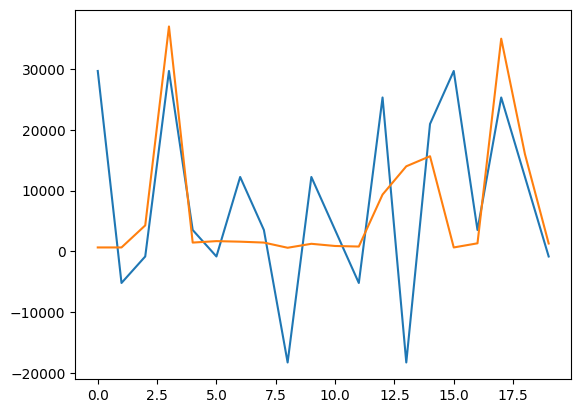

In [358]:
import matplotlib.pyplot as plt
# print(y_test)
plt.plot(yp)
plt.plot(yt)

[4.3 3.4 4.3 4.4 4.5 4.7 4.4 4.5 4.4 4.5 3.9 3.8 4.5 3.8 4.5 4.6 4.1 4.5
 4.5 4.3 4.1 3.7 3.8 3.8 4.5 3.8 3.7 3.6 3.9 4.5 4.  4.2 4.2 4.2 4.  3.9
 3.9 3.6 3.6 3.8 4.1 3.9 4.1 4.3 4.3 3.8 4.  3.5 4.7 4.6 4.4 3.8 4.1 3.6
 3.5 4.7 3.7 4.4 3.8 3.8 4.5 3.8 4.5 4.7 4.7 3.9 3.9 4.1 3.6 3.9 4.3 4.4
 4.7 4.5 4.  4.  4.4 4.4 4.2 3.9 4.5 3.9 3.4 4.  4.  4.2 3.9 3.9 3.8 3.6
 3.4 3.7 4.5 4.3 4.2 4.3 4.3 3.9 4.4 4.2 3.7 4.5 4.5 3.9 4.5 3.9 4.5 4.2
 4.1 4.3 4.1 4.  4.1 4.3 3.7 3.7 3.5 4.3 3.9 3.5 4.3 3.8 4.4 4.  3.7 4.2
 4.7 4.5 4.5 3.9 4.1 4.4 3.7 4.2 3.6 3.4 3.6 4.5 4.2 4.2 4.2 4.1 4.3 3.2
 4.1 3.7 4.1 3.5 4.1 4.4 3.9 3.8 4.4 3.9 3.6 3.7 4.1 4.3 4.  4.4 3.5 3.4
 4.4 4.2 4.2 4.6 4.2 4.4 4.4 3.8 4.1 4.  3.4 4.1 4.5 3.5 3.5 3.3 3.9 4.2
 3.5 4.1 4.1 3.6 4.1 4.7 4.3 4.  3.4 3.7 4.4 4.  4.5 3.2 4.1 4.1 3.3 3.9
 4.3 3.5 4.4 4.1 3.8 4.2 3.4 3.6 4.3 4.5 4.7 4.4 3.9 4.5 4.8 3.1 3.5 4.4
 3.5 4.  3.9 4.3 3.5 4.6 4.5 4.4 4.1 3.2 4.2 3.7 4.1 4.  3.6 3.4 3.8 3.8
 4.5 3.  3.4 3.9 3.4 4.1 4.5 3.5 3.5 4.1 3.9 3.5 4.

ValueError: x and y must be the same size

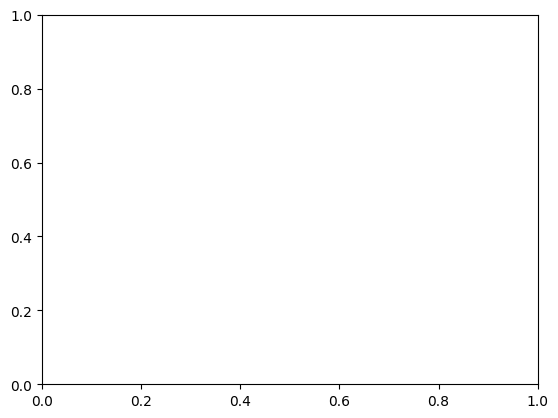

In [ ]:
import matplotlib.pyplot as plt
x1 = X[:,0]
x2 = X[:,1]
x3 = X[:,2]
x4 = X[:,3]
print(x1)
plt.scatter(x1,y)
plt.scatter(x2,y)
plt.scatter(x3,y)
plt.scatter(x4,y)
plt.plot(x1,y_predict)


